In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
import sklearn
from sklearn.tree import DecisionTreeClassifier # predict proba
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.impute import SimpleImputer
import xgboost as xgb
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier

In [4]:
Rain_train = pd.read_csv('Data/Train.Feature.2.Rain.csv')
Rain_train.head(4)

,id,maxtemp,dewpoint,humidity,cloud,sunshine,windspeed,maxt-dew,cloud_humidity,cloud_humidity/Press,clo^2,wi,sun_humidity,rainfall
0,0,21.2,19.4,87.0,88.0,1.1,17.2,1.8,7656.0,7.525064,7744.0,60.87,0.012644,1
1,1,16.2,15.4,95.0,91.0,0.0,21.9,0.8,8645.0,8.479647,8281.0,65.30,0.000000,1
2,2,19.4,9.3,75.0,47.0,8.3,18.1,10.1,3525.0,3.442047,2209.0,41.61,0.110667,1
3,3,18.1,16.8,95.0,95.0,0.0,35.6,1.3,9025.0,8.905664,9025.0,66.50,0.000000,1


In [6]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Select features and target variable
X = Rain_train.drop(['rainfall', 'id'], axis=1)
y = Rain_train['rainfall']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
model_stu = XGBClassifier()

In [8]:
model_stu.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [9]:
params = {'base_score': [0.5],
         'booster': ['gbtree'],
         'colsample_bylevel': [1],
         'colsample_bynode': [0.6],
         'colsample_bytree': [0.7],
         'gamma': [0.01],
         'learning_rate': [0.06,0.05,0.04,0.02],
         'max_depth':[2,3,4],
         'min_child_weight': [1],
         'n_estimators': [400,500,600],
         'n_jobs': [-1],
         'reg_alpha': [0.1],
         'reg_lambda': [0.01,0.1],
         'scale_pos_weight': [1],
         'subsample': [0.9]}

In [10]:
scoring = ["roc_auc"]
grid_solver = GridSearchCV(estimator = model_stu,
                   param_grid = params,
                   scoring = scoring,
                   cv = 5,
                   n_jobs=-1,
                   refit="roc_auc",
                   verbose = 2)

In [11]:
student_results = grid_solver.fit(X,y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [12]:
student_results.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=0.6, colsample_bytree=0.7,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.01,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [13]:
y_pred_Stu = student_results.predict(X)
y_pred_Stu

array([1, 1, 0, ..., 1, 1, 1], shape=(2190,))

In [15]:
from sklearn.metrics import confusion_matrix

def confusion(ytest,y_pred):
    names=["No Rain","Rain"]
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

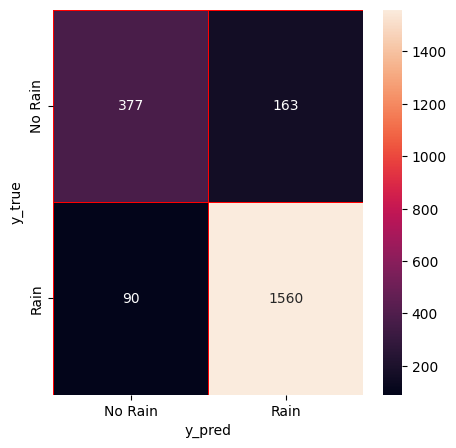

In [16]:
confusion(y,y_pred_Stu)

In [18]:
from sklearn.metrics import accuracy_score
Xboost_City = accuracy_score(y,y_pred_Stu)
Xboost_City

0.8844748858447489

In [19]:
Rain_test = pd.read_csv('Data/Te.Feature.2.Rain.csv')
Rain_test.head(4)

,id,maxtemp,dewpoint,humidity,cloud,sunshine,windspeed,maxt-dew,cloud_humidity,cloud_humidity/Press,clo^2,wi,sun_humidity
0,2190,17.5,14.9,96.0,99.0,0.0,24.3,2.6,9504.0,9.322217,9801.0,68.10,0.000000
1,2191,17.5,15.1,97.0,99.0,0.0,35.3,2.4,9603.0,9.447122,9801.0,68.50,0.000000
2,2192,11.2,8.9,86.0,96.0,0.0,16.9,2.3,8256.0,8.063287,9216.0,63.20,0.000000
3,2193,20.6,9.5,75.0,45.0,7.1,50.6,11.1,3375.0,3.299443,2025.0,41.37,0.094667


In [20]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Select features and target variable
X = Rain_test.drop(['id'], axis=1)


# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [21]:
Students_model = student_results.best_estimator_

In [23]:
Rain_Prediction = Students_model.predict(X)
Rain_Prediction

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [24]:
 Rain_test['rainfall']=Rain_Prediction

In [25]:
 Rain_test

,id,maxtemp,dewpoint,humidity,cloud,sunshine,windspeed,maxt-dew,cloud_humidity,cloud_humidity/Press,clo^2,wi,sun_humidity,rainfall
0,2190,17.5,14.9,96.0,99.0,0.0,24.3,2.6,9504.0,9.322217,9801.0,68.10,0.000000,1
1,2191,17.5,15.1,97.0,99.0,0.0,35.3,2.4,9603.0,9.447122,9801.0,68.50,0.000000,1
2,2192,11.2,8.9,86.0,96.0,0.0,16.9,2.3,8256.0,8.063287,9216.0,63.20,0.000000,1
3,2193,20.6,9.5,75.0,45.0,7.1,50.6,11.1,3375.0,3.299443,2025.0,41.37,0.094667,0
4,2194,16.1,4.3,68.0,49.0,9.2,19.4,11.8,3332.0,3.259636,2401.0,39.14,0.135294,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2915,18.2,13.7,96.0,95.0,0.0,34.3,4.5,9120.0,8.934169,9025.0,66.90,0.000000,1
726,2916,23.2,16.0,78.0,80.0,1.6,25.2,7.2,6240.0,6.167836,6400.0,54.72,0.020513,1
727,2917,21.0,15.5,92.0,96.0,0.0,21.9,5.5,8832.0,8.635964,9216.0,65.60,0.000000,1
728,2918,21.0,19.8,94.0,93.0,0.0,39.5,1.2,8742.0,8.617902,8649.0,65.50,0.000000,1


In [26]:
Submission_Rain =  Rain_test[['id','rainfall']]

In [27]:
Submission_Rain

,id,rainfall
0,2190,1
1,2191,1
2,2192,1
3,2193,0
4,2194,0
...,...,...
725,2915,1
726,2916,1
727,2917,1
728,2918,1


In [28]:
Submission_Rain.to_csv('Data/submission/Submission.2.Rain.csv', index=False)